In [2]:
import gensim
import pprint
import regex as re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import os
import string
import spacy
import datetime# For preprocessing
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
from nltk.corpus import wordnet as wn
from collections import Counter
import random
import matplotlib.patches as mpatches
import math

In [3]:
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [4]:
#synsets
syns_homo = ['homoseksuele', 'gay', 'flikker','homo', 'homofiel', 'homoseksueel']
syns_neger = ['moor', 'neger', 'negerin'] 
syns_zigeuner = ['roma', 'zigeunerin', 'gipsy', 'zigeuner']
synsets = syns_homo + syns_neger +syns_zigeuner

In [6]:
%%time
#kopieercode voor laden
model_40s = Word2Vec.load("models_2107/model_40_2107.wordvectors", mmap='r')
model_50s = Word2Vec.load("models_2107/model_50_2107.wordvectors", mmap='r')
model_60s = Word2Vec.load("models_2107/model_60_2107.wordvectors", mmap='r')
model_70s = Word2Vec.load("models_2107/model_70_2107.wordvectors", mmap='r')
model_80s = Word2Vec.load("models_2107/model_80_2107.wordvectors", mmap='r')
model_90s = Word2Vec.load("models_2107/model_90_2107.wordvectors", mmap='r')

na_model_40s = Word2Vec.load("models_2107/na_model_40_2107.wordvectors", mmap='r')
na_model_50s = Word2Vec.load("models_2107/na_model_50_2107.wordvectors", mmap='r')
na_model_60s = Word2Vec.load("models_2107/na_model_60_2107.wordvectors", mmap='r')
na_model_70s = Word2Vec.load("models_2107/na_model_70_2107.wordvectors", mmap='r')
na_model_80s = Word2Vec.load("models_2107/na_model_80_2107.wordvectors", mmap='r')
na_model_90s = Word2Vec.load("models_2107/n_model_90_2107.wordvectors", mmap='r')

models_dec = [model_40s,model_50s,model_60s,model_70s,model_80s,model_90s]
models_na = [na_model_40s,na_model_50s,na_model_60s,na_model_70s,na_model_80s,na_model_90s]

CPU times: user 4.95 s, sys: 936 ms, total: 5.89 s
Wall time: 6.49 s


In [7]:
%%time
#baseline woorden
baseline_words = []
all_words = []
for model in models_dec + models_na:
    vocab = list(model.wv.vocab)
    all_words.append(vocab)
    
baseline_words = set.intersection(*map(set,all_words))

sample_baseline = random.sample(baseline_words, 20)
len(baseline_words),baseline_words



CPU times: user 113 ms, sys: 17.9 ms, total: 131 ms
Wall time: 133 ms


(4804,
 {'daniël',
  'pas.',
  'wonen',
  'fluiten',
  'achterst',
  'hulde',
  'mars',
  'helling',
  'oplopen',
  'waar',
  'wonderlijk',
  'christian',
  'hervatten',
  'boete',
  'gerecht',
  'enige',
  'geleerde',
  'aardig',
  'service',
  'flauw',
  'alsof',
  'akte',
  'vast',
  'beramen',
  'karakter',
  'kleurig',
  'verklaren',
  'dopen',
  'karl',
  'leek',
  'spreker',
  'jarig',
  'onderwerpen',
  'invallen',
  'tempo',
  'bezitten',
  'bijeen',
  'roermond',
  'reliëf',
  'belasten',
  'pilatus',
  'koningin',
  'kon.',
  'troost',
  'onzichtbaar',
  'heimelijk',
  'ontroeren',
  'dwars',
  'export',
  'begroeten',
  'bouwmeester',
  'centraal',
  'trio',
  'kooi',
  'krijger',
  'rubber',
  'vondst',
  'zora',
  'betrappen',
  'onderhouden',
  'ware',
  'plat',
  'polen',
  'loon',
  'gemeenschappelijk',
  'huidig',
  'bovenstaand',
  'voorwaarde',
  'les',
  'rivier',
  'opgewonden',
  'miller',
  'regiem',
  'vellen',
  'verwerpen',
  'bernard',
  'plegen',
  'bereid'

In [8]:
def tsne_plot(model,perp):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    features = [word for word in synsets if word in model.wv.vocab if word != 'homoseksueel' and word != 'moor']
    
    #trace1: target words homo
    homo = [i for i in syns_homo if i in model.wv.vocab]
    
    #trace2: target words neger
    neger = [i for i in syns_neger if i in model.wv.vocab]
    
    #trace3: most_sim homo
    homo_sim = []
    for i in homo:
        homo_sim += [i[0] for i in list(model.most_similar(i,topn=5))]
    homo_sim = list(set(homo_sim))
    
    if len(homo_sim) > 10:
        homo_sim = random.sample(list(set(homo_sim)),10)
    
    #trace4: most_sim neger
    neger_sim = []
    for i in neger:
        neger_sim += [i[0] for i in list(model.most_similar(i,topn=5))]
    
    if len(neger_sim) > 10:
        neger_sim = random.sample(list(set(neger_sim)),10)

    #trace5: baseline_words
    baseline_words = sample_baseline
    
    labels = homo + neger + homo_sim + neger_sim + baseline_words
    tokens = [model[i] for i in labels]
    tsne_model = TSNE(perplexity=perp, n_components=2, init='pca', n_iter=500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    vals_words = list(zip(labels,new_values))
    
    x1 = [i[1][0] for i in vals_words if i[0] in features]
    y1 = [i[1][1] for i in vals_words if i[0] in features]
    
    x2 = [i[1][0] for i in vals_words if i[0] in homo_sim]
    y2 = [i[1][1] for i in vals_words if i[0] in homo_sim]
    
    x3 = [i[1][0] for i in vals_words if i[0] in neger_sim]
    y3 = [i[1][1] for i in vals_words if i[0] in neger_sim]
    
    x4 = [i[1][0] for i in vals_words if i[0] in baseline_words]
    y4 = [i[1][1] for i in vals_words if i[0] in baseline_words]
 

    plt.figure(figsize=(14, 14))
    
    for i in range(len(features)):
        plt.scatter(x1[i],y1[i],color='black',s=150)
        plt.annotate(features[i],
                     xy=(x1[i], y1[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    for i in range(len(homo_sim)):
        plt.scatter(x2[i],y2[i],color='red',s=150)
        plt.annotate(homo_sim[i],
                     xy=(x2[i], y2[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    for i in range(len(neger_sim)):
        plt.scatter(x3[i],y3[i],color='blue',s=150)
        plt.annotate(neger_sim[i],
                     xy=(x3[i], y3[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
    for i in range(len(baseline_words)):
        plt.scatter(x4[i],y4[i],color='grey',s=150)
        plt.annotate(baseline_words[i],
                     xy=(x4[i], y4[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    black_patch = mpatches.Patch(color='black', label='search terms')
    red_patch = mpatches.Patch(color='red', label='most similar to homo')
    blue_patch = mpatches.Patch(color='blue', label='most similar to neger')
    grey_patch = mpatches.Patch(color='grey', label='baseline words')
    plt.legend(handles=[black_patch,red_patch,blue_patch,grey_patch])

<ipython-input-8-7dde9a672737>:16: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  homo_sim += [i[0] for i in list(model.most_similar(i,topn=5))]
<ipython-input-8-7dde9a672737>:25: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  neger_sim += [i[0] for i in list(model.most_similar(i,topn=5))]
<ipython-input-8-7dde9a672737>:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens = [model[i] for i in labels]


CPU times: user 1.17 s, sys: 242 ms, total: 1.41 s
Wall time: 447 ms


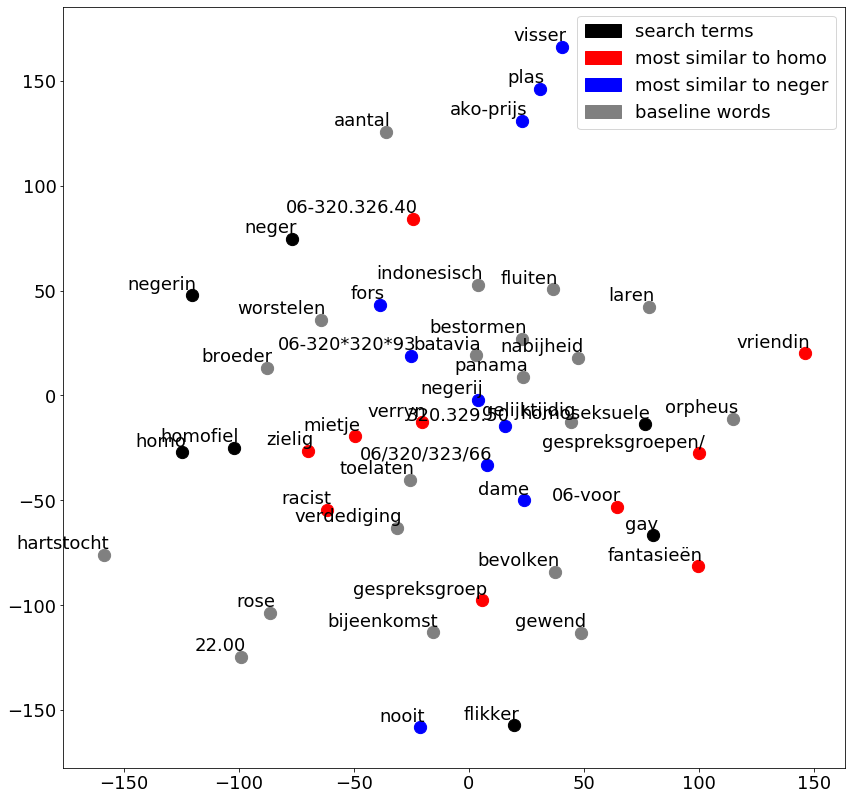

In [10]:
%%time
models_dec = [model_40s,model_50s,model_60s,model_70s,model_80s,model_90s]

tsne_plot(model_90s,7)